# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

In [ ]:
! git clone https://github.com/ds4e/linearModels

Cloning into 'linearModels'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 40 (delta 9), reused 9 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 3.62 MiB | 8.78 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?



1. A model is linear when independent variables can represent a dependent variable. It is linear because the line has to be straight. It's linear in how it is shaped.

2. The coefficient for a dummy variable represents how much it increases the y when the observation has that trait. So, it is the difference between having that variable and not.

3. Technically yes, but it wouldn't be good because it is limited in its tools to deal with outliers. We've seen graphs where everything is so spread apart (which would be nice for classification) and the line doesn't describe the graph right at all. Also, its more continuous.

4. A sign that my graph is overfitting is when there is high variance. The graph will bend in weird ways to incorprate all the test data, but in reality there just will be outliers sometimes.

5. Multi-colinearity is when you have indendent variables that are related to eachother. In two-stage least squares technique this is checked when the first stage checks the endogenous variables and the second variable regresses the dependent variable on the predicted values. So two-stage least squares combats multi-colinearity by reducing its effect.

6. You can do this by adding variables that are just the same variable but with non-linear function effecting it. Ex: var -> var^2 or log(var). This would keep it linear but still add non linear elements. Also, to add independent variables like features/control is to make it into a dummy variable (True/False)

7. An intercept can be interpretated as the starting point, so when all the variables are 0, then the y is that. A slope coefficient is the the rate that y increases when that x increases. The coefficient of a dummy variable represents the average increase to the y when it is true.

**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [ ]:
df2 = pd.read_csv('./linearModels/data/Q1_clean.csv')
df2['Neighbourhood'] = df2['Neighbourhood ']
df2.drop(columns=['Neighbourhood '], inplace=True)
df2.head()


,Price,Review Scores Rating,Property Type,Room Type,Neighbourhood
0,549,96.0,Apartment,Private room,Manhattan
1,149,100.0,Apartment,Entire home/apt,Brooklyn
2,250,100.0,Apartment,Entire home/apt,Manhattan
3,90,94.0,Apartment,Private room,Brooklyn
4,270,90.0,Apartment,Entire home/apt,Manhattan


In [ ]:
#1
df2neighbor = df2.groupby('Neighbourhood')
df2neighbor['Price'].mean()


# Manhattan is the most expensive on average

,Price
Neighbourhood,
Bronx,75.276498
Brooklyn,127.747378
Manhattan,183.664286
Queens,96.857233
Staten Island,146.166667


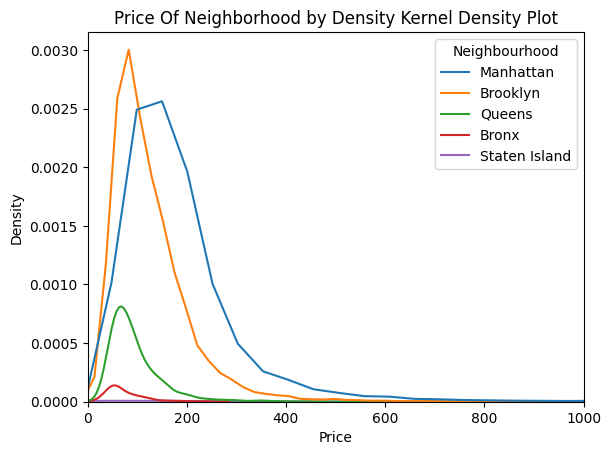

In [ ]:

var = 'Price'
g = 'Neighbourhood'
y = sns.kdeplot(data=df2, x=var, hue = g)
y.set_title('Price Of Neighborhood by Density Kernel Density Plot')
y.set_xlim(0, 1000)  # Set x-axis limits because the graph before this is very zoomed out

plt.show()


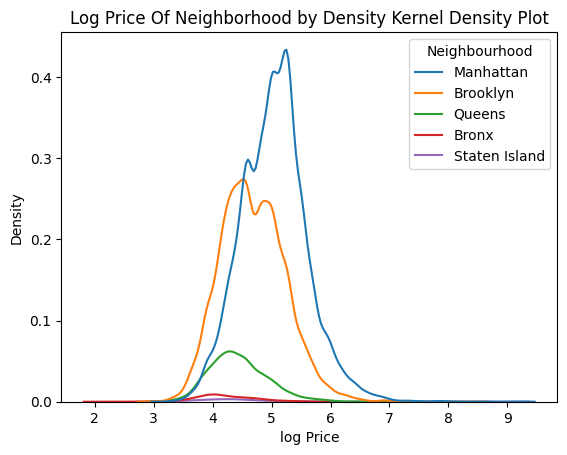

In [ ]:
df2['log Price'] = np.log(df2['Price'])
var = 'log Price'
g = 'Neighbourhood'

y = sns.kdeplot(data=df2, x=var, hue = g)
y.set_title('Log Price Of Neighborhood by Density Kernel Density Plot')

plt.show()


In [ ]:
# 2

# Target Variable
y = df2['Price']

# Brand Dummy:
X_d = pd.get_dummies(df2['Neighbourhood'],dtype='int') # Create brand dummies

X_d2 = pd.get_dummies(df2['Property Type'],dtype='int') # Create brand dummies


X_d3 = pd.get_dummies(df2['Room Type'],dtype='int') # Create brand dummies

X = pd.concat([df2.drop(columns=['Neighbourhood', 'Property Type', 'Room Type', 'log Price', 'Price']) ,X_d, X_d2], axis=1) # Concatenate engineered features
X.head()





reg = LinearRegression(fit_intercept=False).fit(X, y)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X, y)) # R squared measure
results


# Compare the coefficients in the regression to the table from part 1.
# What pattern do you see?
# What are the coefficients in a regression of a continuous variable on one categorical variable?

# The coefficients in the regression and the table values are relaated as the higher average ones like Brooklyn and Manhattan have
# a positive coefficent while the lower average ones like Bronx or Queens have negative coefficients.
# They are actually in the same order as the table.

# Categorical are dummy variables (ex: Bronx T/F, Apartment T/F). Review Scores rating is a continuous variable.

R-squared:  0.0598039798730402


,variable,coefficient
0,Review Scores Rating,1.071540
1,Bronx,-36.342956
2,Brooklyn,22.206561
3,Manhattan,84.007099
4,Queens,-9.488912
5,Staten Island,27.570108
6,Apartment,-0.326647
7,Bed & Breakfast,-30.376096
8,Boat,55.921947
9,Bungalow,55.288250


In [ ]:
# 3

# Target Variable
y = df2['Price']

# Brand Dummy:
X_d = pd.get_dummies(df2['Neighbourhood'],dtype='int', drop_first=True) # Create brand dummies

X_d2 = pd.get_dummies(df2['Property Type'],dtype='int', drop_first=True) # Create brand dummies


X_d3 = pd.get_dummies(df2['Room Type'],dtype='int', drop_first=True) # Create brand dummies

X = pd.concat([df2.drop(columns=['Neighbourhood', 'Property Type', 'Room Type', 'log Price', 'Price']) ,X_d, X_d2], axis=1) # Concatenate engineered features
X.head()





reg = LinearRegression(fit_intercept=True).fit(X, y)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X, y)) # R squared measure
display(results)

print("Intercept:", reg.intercept_)


# How do you have to handle the creation of the dummies differently? What is the intercept?
# Interpret the coefficients.
# How can I get the coefficients in part 2 from these new coefficients?


# To keep the intercept, I have to drop the first variable in each dummy variable to avoid the dummy variable trap.
# The intercept is -36.66960308187845, which means nothing in this case because price cannot be negative


# Positive coefficients mean it increases what the price should be, and negative means that it decreases the price
# Review Scores Rating has a positive correlation with price

# Brooklyn, Manhattan, Queens, Staten Island, Boat, Bungalow, Cabin, Condominium, House, Loft, Other, Townhouse, Treehouse, Villa
# all have a positive correlation

# Bed & Breakfast, Camper/RV, Castle, Chalet, Dorm, Hut, Lighthouse all have a negative correlation

# Manhattan, Condo, and Townhouse all have the largest positive impact

# Hut and lighthouse have the largest negative impact




R-squared:  0.05980397987304009


,variable,coefficient
0,Review Scores Rating,1.071540
1,Brooklyn,58.549517
2,Manhattan,120.350055
3,Queens,26.854044
4,Staten Island,63.913063
5,Bed & Breakfast,-30.049449
6,Boat,56.248595
7,Bungalow,55.614897
8,Cabin,35.379336
9,Camper/RV,-15.773691


Intercept: -36.66960308187845


In [ ]:
# 4

from sklearn.model_selection import train_test_split


y = df2['Price']

X_d = pd.get_dummies(df2['Neighbourhood'],dtype='int', drop_first=True) # Create brand dummies

X = pd.concat([df2['Review Scores Rating'], X_d], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

X_train.head()



,Review Scores Rating,Brooklyn,Manhattan,Queens,Staten Island
10373,89.0,0,1,0,0
12093,97.0,1,0,0,0
16279,60.0,0,1,0,0
10098,89.0,1,0,0,0
14728,50.0,0,1,0,0


In [ ]:
from sklearn.metrics import mean_squared_error
import math

data = ['Review Scores Rating', 'Brooklyn',	'Manhattan',	'Queens',	'Staten Island']


# Initialize and fit the linear regression model
reg = LinearRegression().fit(X_train[data], y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test[data])

# Calculate R-squared and RMSE
r_squared = reg.score(X_test[data], y_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r_squared}")
print(f"RMSE: {rmse}")

# Get the coefficient for 'Review Scores Rating'
review_score_coefficient = reg.coef_[0]
print(f"Coefficient for Review Scores Rating: {review_score_coefficient}")


print("Coefficents")
for i, coef in enumerate(reg.coef_):
    print(f"{reg.feature_names_in_[i]}: {coef}")

# Got help from Gemeni

# R-squared: 0.029117109332052915
# RMSE: 194.0474943299375

# Review Scores Rating coefficient is 1.01609586375163


# The most expensive kind of property you can rent is in Manhattan with a 100% (max) review score rating.



R-squared: 0.029117109332052915
RMSE: 194.0474943299375
Coefficient for Review Scores Rating: 1.01609586375163
Coefficents
Review Scores Rating: 1.01609586375163
Brooklyn: 51.18317547126126
Manhattan: 107.92912189294105
Queens: 21.6849934877549
Staten Island: 83.13695685042063


In [ ]:
# 5

y = df2['Price']

X_d = pd.get_dummies(df2['Neighbourhood'],dtype='int', drop_first=True) # Create brand dummies
X_d2 = pd.get_dummies(df2['Property Type'],dtype='int', drop_first=True)

X = pd.concat([df2['Review Scores Rating'], X_d, X_d2], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

X_train.head()



,Review Scores Rating,Brooklyn,Manhattan,Queens,Staten Island,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,...,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Townhouse,Treehouse,Villa
10373,89.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12093,97.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16279,60.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10098,89.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14728,50.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics import mean_squared_error
import math

data = ['Review Scores Rating', 'Brooklyn',	'Manhattan',	'Queens',	'Staten Island', 'Bed & Breakfast', 'Boat', 'Bungalow', 'Cabin',
       'Camper/RV', 'Castle', 'Chalet', 'Condominium', 'Dorm', 'House', 'Hut',
       'Lighthouse', 'Loft', 'Other', 'Townhouse', 'Treehouse', 'Villa']


# Initialize and fit the linear regression model
reg = LinearRegression().fit(X_train[data], y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test[data])

# Calculate R-squared and RMSE
r_squared = reg.score(X_test[data], y_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r_squared}")
print(f"RMSE: {rmse}")

# Get the coefficient for 'Review Scores Rating'
review_score_coefficient = reg.coef_[0]
print(f"Coefficient for Review Scores Rating: {review_score_coefficient}")


print("Coefficents")
for i, coef in enumerate(reg.coef_):
    print(f"{reg.feature_names_in_[i]}: {coef}")

# Got help from Gemeni

# R-squared: 0.0334068421154583
# RMSE: 193.61833164635303

# Review Scores Rating coefficient is 1.0022207483987255


# The most expensive kind of property you can rent is a Condominium in Manhattan with a 100% (max) review score rating.



R-squared: 0.0334068421154583
RMSE: 193.61833164635303
Coefficient for Review Scores Rating: 1.0022207483987255
Coefficents
Review Scores Rating: 1.0022207483987255
Brooklyn: 57.696137840189564
Manhattan: 119.46299352452823
Queens: 26.64377394059499
Staten Island: 75.53522326443529
Bed & Breakfast: -35.946529769264316
Boat: 56.390134905835936
Bungalow: 27.56848988696624
Cabin: 35.174425333791305
Camper/RV: -14.920885783164335
Castle: -39.76516456155793
Chalet: -27.99608812882108
Condominium: 102.4852921534787
Dorm: -48.55811501612811
House: 31.105038030423167
Hut: -133.75184007116556
Lighthouse: -88.99830887721961
Loft: 62.8245614704432
Other: 45.22065231907825
Townhouse: 78.25424545348305
Treehouse: -75.73740520657401
Villa: 34.29911793965338


6. What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

The coefficient on Review Scores Rating means how much does that score impacts the overall price in the context of the equation. The coefficient does change slightly between the equations. This is because now that property type is accounted for, the review score matters slightly less because there is another variable that can better represent certain properties.

**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

In [ ]:
df4 = pd.read_csv('/content/linearModels/assignment/data/heart_hw.csv')

df4.head()

,Unnamed: 0,age,transplant,y
0,1,53,control,0
1,2,43,control,0
2,3,52,control,0
3,4,52,control,0
4,5,54,control,0


In [ ]:
# 1

x = df4.groupby(['transplant', 'y']).count()
display(x)
# treatement: 24/45
# control: 4/30 survived

print("treatement:", (24/45))
print("control:", (4/30))

print("Average Treatment Effect: ", ((24/45) -  (4/30)))



Unnamed: 0  age
transplant y                 
control    0          30   30
           1           4    4
treatment  0          45   45
           1          24   24

treatement: 0.5333333333333333
control: 0.13333333333333333
Average Treatment Effect:  0.4


In [ ]:
# 2

# Target Variable
y = df4['y']

# Brand Dummy:
X = pd.get_dummies(df4['transplant'],dtype='int', drop_first=True) # Create brand dummies


X.head()





reg = LinearRegression(fit_intercept=True).fit(X, y)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X, y)) # R squared measure
display(results)

print("Intercept:", reg.intercept_)


# The coefficent is about half of the Average Treatment Effect:  0.4
# However, the coefficent of treatement + intercept is 0.347826059 which is also about half of the treatment population proportion
# The intercept is very similar to the control proportion (0.1176470588235293 vs 0.13)
# This makes sense because the intercept without the treatment = 1 would essentially be the control population



R-squared:  0.059188892948483174


,variable,coefficient
0,treatment,0.230179


Intercept: 0.1176470588235293


In [ ]:
# 3

# Target Variable
y = df4['y']

# Brand Dummy:
X_d = pd.get_dummies(df4['transplant'],dtype='int', drop_first=True) # Create brand dummies

X = pd.concat([df4['age'] , X_d], axis=1) # Concatenate engineered features

X.head()





reg = LinearRegression(fit_intercept=True).fit(X, y)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X, y)) # R squared measure
display(results)

print("Intercept:", reg.intercept_)

# The intercept has now increased as it is assuming at age 0, so the chances of living past 3 years will decrease as age increases.



R-squared:  0.14678065941634288


,variable,coefficient
0,age,-0.013607
1,treatment,0.264702


Intercept: 0.7019569721740946


In [ ]:
# 4
from sklearn.preprocessing import PolynomialFeatures

# Target Variable
y = df4['y']

# Brand Dummy:
X_d = pd.get_dummies(df4['transplant'],dtype='int', drop_first=True) # Create brand dummies

X = pd.concat([df4['age'] , X_d], axis=1) # Concatenate engineered features



expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
display(zdf.head())



X_train, X_test, y_train, y_test = train_test_split(zdf,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

display(X_train.head())



,age,treatment,age^2,age treatment,treatment^2
0,53.0,0.0,2809.0,0.0,0.0
1,43.0,0.0,1849.0,0.0,0.0
2,52.0,0.0,2704.0,0.0,0.0
3,52.0,0.0,2704.0,0.0,0.0
4,54.0,0.0,2916.0,0.0,0.0


,age,treatment,age^2,age treatment,treatment^2
81,52.0,1.0,2704.0,52.0,1.0
43,39.0,0.0,1521.0,0.0,0.0
59,47.0,1.0,2209.0,47.0,1.0
13,40.0,0.0,1600.0,0.0,0.0
78,52.0,1.0,2704.0,52.0,1.0


In [ ]:
data = ['age',	'treatment',	'age^2',	'age', 'treatment',	'treatment^2']


# Initialize and fit the linear regression model
reg = LinearRegression().fit(X_train[data], y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test[data])

# Calculate R-squared and RMSE
r_squared = reg.score(X_test[data], y_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r_squared}")
print(f"RMSE: {rmse}")

# Get the coefficient for 'Review Scores Rating'
review_score_coefficient = reg.coef_[0]
print(f"Coefficient for Review Scores Rating: {review_score_coefficient}")


print("Coefficents")
for i, coef in enumerate(reg.coef_):
    print(f"{reg.feature_names_in_[i]}: {coef}")




R-squared: 0.2586366266698229
RMSE: 0.3889712683713329
Coefficient for Review Scores Rating: 0.01416541937024004
Coefficents
age: 0.01416541937024004
treatment: 0.06310848977797903
age^2: -0.0005248749356753096
age: 0.01416541937024011
treatment: 0.06310848977797896
treatment^2: 0.06310848977797896


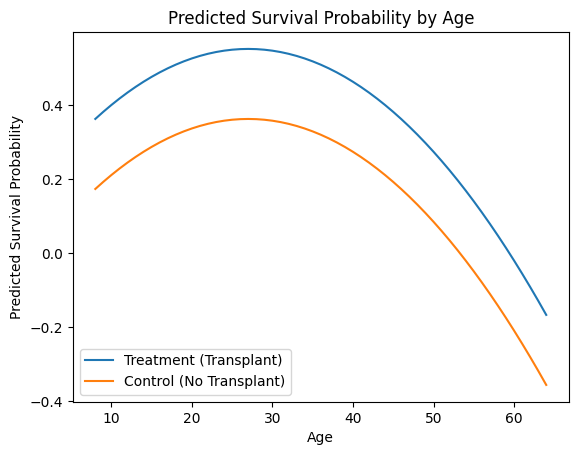

In [ ]:
ages = np.arange(df4['age'].min(), df4['age'].max() + 1)
treatment_probs = []
control_probs = []

for age in ages:
    X_pred_treatment = pd.DataFrame({'age': [age], 'treatment': [1], 'age^2': [age**2], 'age': [age], 'treatment': [1], 'treatment^2': [1**2]})  # treatment = 1
    X_pred_control = pd.DataFrame({'age': [age], 'treatment': [0], 'age^2': [age**2], 'age': [age], 'treatment': [0], 'treatment^2': [0**2]})  # treatment = 0

    treatment_prob = reg.predict(X_pred_treatment[data])[0]
    control_prob = reg.predict(X_pred_control[data])[0]

    treatment_probs.append(treatment_prob)
    control_probs.append(control_prob)

sns.lineplot(x=ages, y=treatment_probs, label='Treatment (Transplant)')
sns.lineplot(x=ages, y=control_probs, label='Control (No Transplant)')
plt.xlabel('Age')
plt.ylabel('Predicted Survival Probability')
plt.title('Predicted Survival Probability by Age')
plt.legend()
plt.show()


# Help from gemini  ^

# For both treatment and control Age initially increases the Suriviability, but
# at around 25, it starts decreasing the surviability as age increases

# Treatment survivability is larger then control at every point when there age is equal


5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?



I would be concerned about these models because they work on the assumption they have enough data and the data they are getting is correct. I would be concerned about this because the data we have in this graph is not enough. There is so much more data that is needed to accurately tell the surviability. What if we don't get that data? Would we punish these people by not giving them a heart?

Also, people might lie about underlying conditions in order to get a heart. This would cause massive problems about the truth in this selection.

Lastly, is it moral to leave it up to machines to decide who gets a heart? If someone has a 1% higher surviability then someone else, does that make them more justified to recieve a heart? There should be some randomness to decide it.

**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result.

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure.

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


**Q10.** Let's look at a cousin of Linear Regression, called **kernel regression** or **local constant least squares** or **Nadaraya-Watson Estimator**.

We derived the OLS estimator for single linear regression by minimizing
$$
SSE(b_0, b_1) = \frac{1}{N}\sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$
with solution
$$
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}, \quad \hat{b}_1 = \dfrac{\frac{1}{N} \sum_{i=1}^N (x_i-\bar{x})(y_i - \bar{y})}{s_x^2}.
$$

When you step back and think about it, this is a bit weird: The algorithm is computing sample means, variances, and covariances, and using those to create a predictive model. The data themselves arguably vanish from the solution. This is elegant, this is strange.

Instead, let $k(z)$ be a kernel function, such as the Gaussian
$$
k(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}
$$
or uniform
$$
k(z) = \begin{cases}
1/2, & |z| \le \frac{1}{2}\\
0, & \text{otherwise.}
\end{cases}
$$
We'll instead minimize, or each predictor value $x$,
$$
SSE(\hat{y}(x)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(x)\right\rbrace^2 \dfrac{1}{h} k \left( \dfrac{x-x_i}{h} \right).
$$

1. Show that the optimal predictor is
$$
\hat{y}(x) = \dfrac{ \frac{1}{Nh} \sum_{i=1}^N  y_i k \left( \dfrac{x-x_i}{h} \right) }{\frac{1}{Nh} \sum_{i=1}^N k \left(  \dfrac{x-x_i}{h} \right)}
$$
This has many names, but let's call it the local constant least squares (LCLS) estimator, as opposed to ordinary least squares (OLS).

2. Compare and contrast LCLS with both OLS and $k$-Nearest Neighbor as a regression algorithm.

3. Write a function or class that implements the LCLS estimator for a single predictor variable $x$. For a default bandwidth $h$, you can use the maximum of the Silverman plug-ins for estimating kernel densities for $X$ and $Y$:
$$
h_y = 1.06 \times s_y^{-1/5}, \quad h_x = 1.06 \times s_x^{-1/5},
$$
$$
h = \max \{ h_y, h_x \}.
$$
For the kernel, you can hard-code the uniform, Gaussian, or Epanechnikov, or make it a parameter the user can adjust with a default choice.

4. For one of the datasets available for the homework, use your LCLS estimator from part 3 to predict values $\hat{y}(x_i)$ for each datapoint $x_i$. Plot your estimator $\hat{y}$ as a line over a scatterplot of the data $\{(x_i,y_i)\}_{i=1}^N$. Tune the bandwidth until you

5. Conceptually, how would you extend this analysis to a vector of predictors, $x = (x_1, ..., x_L)$ instead of just one explanatory variable $x$?
